In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

WARNING [__init__.py]: Environment variable PYMOTE_SETTINGS_MODULE is undefined, using global_settings.


/home/dbarac/.local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/dbarac/.local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/dbarac/.local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/dbarac/.local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


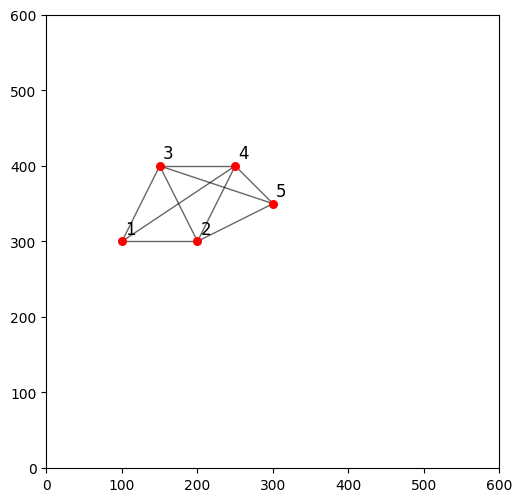

In [2]:
from pymote import Node
from pymote import Network

# reset numbering
Node.cid = 1

# create network
net = Network()
# initiator
n1 = net.add_node(pos=(100, 300), commRange=0)
# will be added in define_initial_rigid_segment
n2 = net.add_node(pos=(200, 300), commRange=0)
n3 = net.add_node(pos=(150, 400), commRange=0)
# will be added in add_neighbors_to_rigid_segment
n4 = net.add_node(pos=(250, 400), commRange=0)
# will be added after receiving 3 NeighborPosition messages
n5 = net.add_node(pos=(300, 350), commRange=0)

net.add_edges_from([
    (n1, n2),
    (n1, n3),
    (n2, n3),
    
    (n1, n4),
    (n2, n4),
    (n3, n4),
    
    (n2, n5),
    (n3, n5),
    (n4, n5),
])
net.show()

In [3]:
# setup sensors
import scipy.stats
from pymote.sensor import DistSensor

trueDistSensor = DistSensor({'pf': scipy.stats.norm, 'scale': 0 }) # no measurement noise
for n in net.nodes():
    n.compositeSensor = ('NeighborsSensor', trueDistSensor)

In [4]:
from pymote import NetworkGenerator
from pymote import write_pickle
from pymote import Simulation

# copy localization.py to pymote/pymote/algorithms/
from pymote.algorithms.localization import IterativeLocalization

net.algorithms = (IterativeLocalization, )

write_pickle(net, "test-net.npc.gz")

sim = Simulation(net)
sim.run()

for n in net.nodes():
    print(n.id, n.status)

DEBUG   [simulation.py]: Simulation 0x7f9ed5d1aaf0 created successfully.
DEBUG   [simulation.py]: [IterativeLocalization] Step 1 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 2 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 3 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 4 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 5 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 6 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 7 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 8 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 9 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 10 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 11 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 12 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 13 finished
DEBUG   [simulation.py]: [IterativeLocalization] Step 14 finished
DEBUG   [sim

In [5]:
#print("Edges:")
#for e in net.edges(data=True):
#    print(e)
    
print("Nodes:")
##for n in net.nodes():
    #print("dists:", n.memory['neighborDistances'])
    #print(n.id, n.memory['position'])

Nodes:


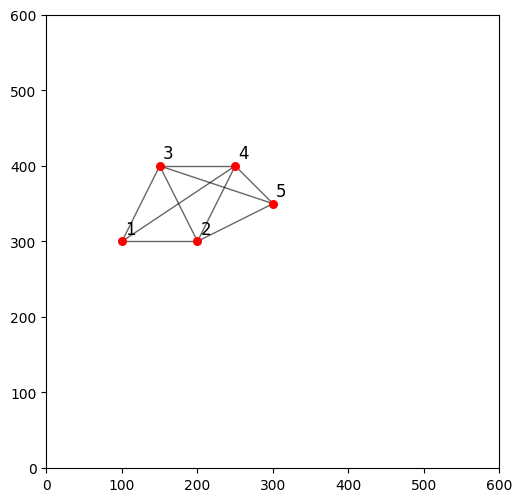

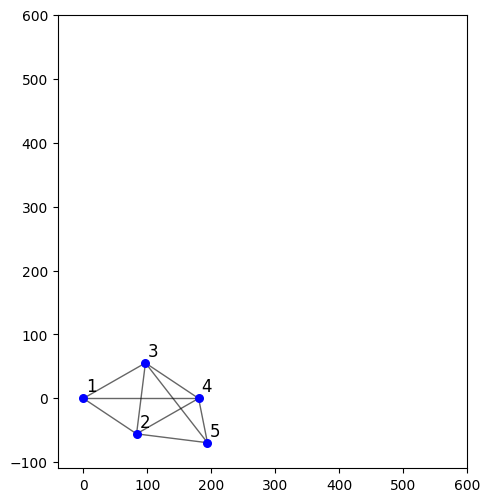

In [6]:
# show localized network
import numpy as np

#print({n: n.memory['position'] for n in net.nodes()})
#net.show(positions={n: np.array(n.memory['position']) for n in net.nodes()})

#for node in net.nodes():
    #print("mem dists:", node.memory['neighborDistances'])
    
positions = [np.array(n.memory['position']) for n in net.nodes()]
pairs = [
    (positions[0], positions[1]),
    (positions[1], positions[2]), 
    (positions[0], positions[2]), 
]
#for (i,j) in pairs:
    #print("localized dist:", np.sqrt(np.sum((i - j) ** 2)))
#print("True positions")
net.show()
#print("Positions in implicit coordinate-system (anchor-free localization)")
net.pos = {n: np.array(n.memory['position']) for n in net.nodes()}
net.show(nodeColor='blue')